In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('customer_churn.csv')
pd.set_option('display.max_columns',None)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
df.shape

(7043, 21)

In [5]:
df.drop('customerID',axis=1,inplace=True)

##### Change the TotalCharges column from object type to numeric

In [6]:
df['TotalCharges']=pd.to_numeric(df['TotalCharges'],errors='coerce')

In [7]:
df.isna().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

<AxesSubplot:xlabel='Churn', ylabel='TotalCharges'>

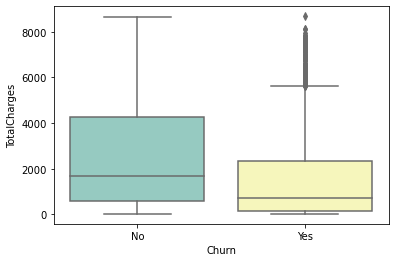

In [8]:
sns.boxplot(x='Churn',y='TotalCharges',data=df,palette='Set3')

In [9]:
df['Churn']=df['Churn'].map({'No':0,'Yes':1})

In [10]:
df.dropna(inplace=True)

In [11]:
df.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

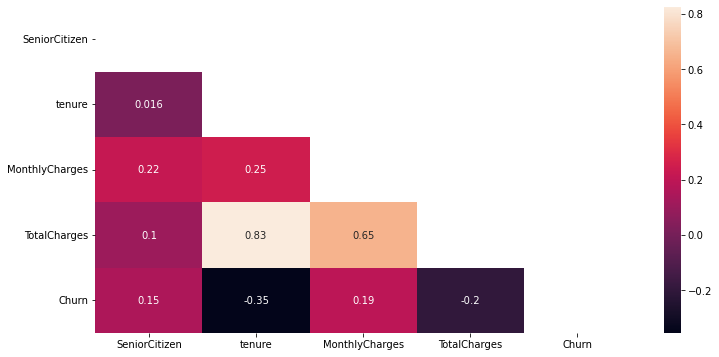

In [12]:
plt.figure(figsize=(12,6))
matrix=np.triu(df.corr())
sns.heatmap(df.corr(),annot=True,mask=matrix)
plt.show()

In [13]:
categorical_variables= [features for features in df.select_dtypes(include='O')]
print(categorical_variables)

['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']


In [14]:
for feature in categorical_variables:
    print(f'{feature} has unique values: {df[feature].unique()}')

gender has unique values: ['Female' 'Male']
Partner has unique values: ['Yes' 'No']
Dependents has unique values: ['No' 'Yes']
PhoneService has unique values: ['No' 'Yes']
MultipleLines has unique values: ['No phone service' 'No' 'Yes']
InternetService has unique values: ['DSL' 'Fiber optic' 'No']
OnlineSecurity has unique values: ['No' 'Yes' 'No internet service']
OnlineBackup has unique values: ['Yes' 'No' 'No internet service']
DeviceProtection has unique values: ['No' 'Yes' 'No internet service']
TechSupport has unique values: ['No' 'Yes' 'No internet service']
StreamingTV has unique values: ['No' 'Yes' 'No internet service']
StreamingMovies has unique values: ['No' 'Yes' 'No internet service']
Contract has unique values: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling has unique values: ['Yes' 'No']
PaymentMethod has unique values: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [15]:
numerical_features=[features for features in df.columns if not features in categorical_variables]
numerical_features.remove('Churn')

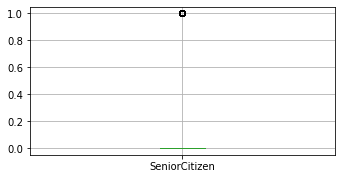

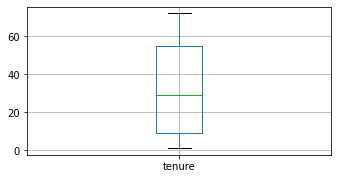

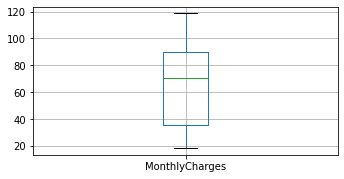

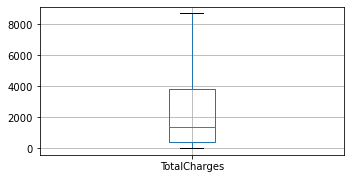

<Figure size 432x288 with 0 Axes>

In [16]:
plotnum=1
for features in numerical_features:
    if plotnum <= 10:
        plt.figure(figsize=(12,6))
        plt.subplot(2,2,plotnum)
        df.boxplot(column=features)
        plt.show()
        plotnum += 1
plt.tight_layout()
    

In [17]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441,0.265785
std,0.368844,24.545260,30.085974,2266.771362,0.441782
min,0.000000,1.000000,18.250000,18.800000,0.000000
25%,0.000000,9.000000,35.587500,401.450000,0.000000
50%,0.000000,29.000000,70.350000,1397.475000,0.000000
75%,0.000000,55.000000,89.862500,3794.737500,1.000000
max,1.000000,72.000000,118.750000,8684.800000,1.000000


C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warni

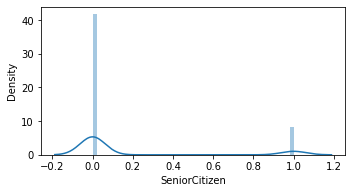

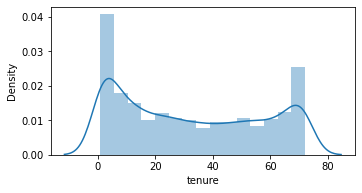

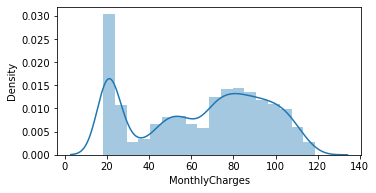

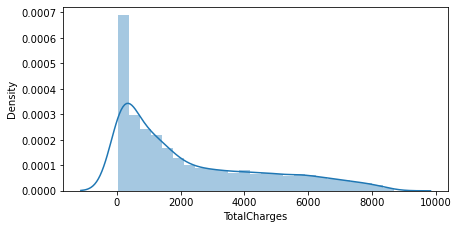

In [18]:
plotnum=1
for features in numerical_features:
    if plotnum <= 10:
        plt.figure(figsize=(12,6))
        plt.subplot(2,2,plotnum)
        sns.distplot(df[features])
        plotnum += 1
plt.tight_layout()        

In [24]:
df=pd.get_dummies(df,drop_first=True)

In [20]:
df['Churn'].value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [25]:
df.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,4263,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0
1,0,34,56.95,920,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
2,0,2,53.85,4109,1,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
3,0,45,42.30,1095,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0
4,0,2,70.70,4708,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0


#### Balance the data using SMOTE

In [43]:
X=df.drop('Churn',axis=1)
y=df.Churn

In [44]:
from imblearn.combine import SMOTETomek
sm=SMOTETomek()
X_sm,y_sm=sm.fit_resample(X,y)

In [45]:
from collections import Counter
print(Counter(y_sm))

Counter({0: 4771, 1: 4771})


In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.3, random_state=42)

In [47]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [48]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score


def classify(X_train, X_test, y_train, y_test):
    accuracy, f1 = [], []
    classifiers = []
    random_state = 42

    classifiers.append(DecisionTreeClassifier(random_state=random_state))
    classifiers.append(AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state)))
    classifiers.append(RandomForestClassifier(random_state=random_state))
    classifiers.append(GradientBoostingClassifier(random_state=random_state))
    classifiers.append(XGBClassifier(random_state=random_state))
    classifiers.append(LogisticRegression(random_state=random_state, solver='lbfgs', max_iter=10000))
    classifiers.append(SVC(random_state=random_state))
    classifiers.append(KNeighborsClassifier())

    for classifier in classifiers:
        model = classifier
        model.fit(X_train, y_train)
        y_preds = model.predict(X_test)
        accuracy.append((accuracy_score(y_test, y_preds)) * 100)
        f1.append(((f1_score(y_test, y_preds))) * 100)

    results_df = pd.DataFrame({"Accuracy Score": accuracy,
                               "f1 Score": f1,
                               "ML Models": ["DecisionTree", "AdaBoost",
                                             "RandomForest", "GradientBoosting","XGB",
                                             "Logistic regression", "SVC", "KNN"]})

    results = (results_df.sort_values(by=['f1 Score'], ascending=False)
               .reset_index(drop=True))

    return classifiers,results


classifiers, results = classify(X_train, X_test, y_train, y_test)

results


,Accuracy Score,f1 Score,ML Models
0,86.273140,86.443601,XGB
1,85.853999,86.096807,RandomForest
2,85.330073,85.906040,GradientBoosting
3,85.260217,85.567715,SVC
4,85.085575,85.199307,Logistic regression
5,82.221446,83.206862,KNN
6,82.256374,82.662116,AdaBoost
7,80.649668,81.014393,DecisionTree


In [57]:
model=XGBClassifier(n_estimators=1000, learning_rate=0.2, max_depth=12, random_state=42)
model.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.2, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=12, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=1000,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=1, ...)

In [58]:
model.score(X_test,y_test)

0.8606356968215159

              precision    recall  f1-score   support

           0       0.87      0.85      0.86      1430
           1       0.85      0.87      0.86      1433

    accuracy                           0.86      2863
   macro avg       0.86      0.86      0.86      2863
weighted avg       0.86      0.86      0.86      2863



<AxesSubplot:>

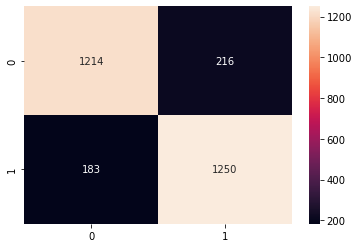

In [59]:
y_pred=model.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,y_pred))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='d')